{'1': array([1., 0.]), '2': array([0.99667258, 0.08150928]), '3': array([0.98671247, 0.16247614]), '4': array([0.97018596, 0.24236174]), '5': array([0.94720301, 0.32063446]), '6': array([0.91791659, 0.39677341]), '7': array([0.88252158, 0.47027191]), '8': array([0.84125353, 0.54064082]), '9': array([0.79438709, 0.60741185]), '10': array([0.74223412, 0.67014066]), '11': array([0.68514171, 0.7284098 ]), '12': array([0.6234898 , 0.78183148]), '13': array([0.55768867, 0.83005021]), '14': array([0.48817621, 0.87274509]), '15': array([0.41541501, 0.909632  ]), '16': array([0.3398893 , 0.94046545]), '24': array([0.26210168, 0.96504026]), '25': array([0.18256982, 0.98319289]), '26': array([0.10182299, 0.99480253]), '27': array([0.02039854, 0.99979193]), '28': array([-0.06116166,  0.99812787]), '29': array([-0.14231484,  0.98982144]), '30': array([-0.22252093,  0.97492791]), '32': array([-0.30124619,  0.9535464 ]), '33': array([-0.3779667 ,  0.92581919]), '34': array([-0.45217191,  0.89193081])

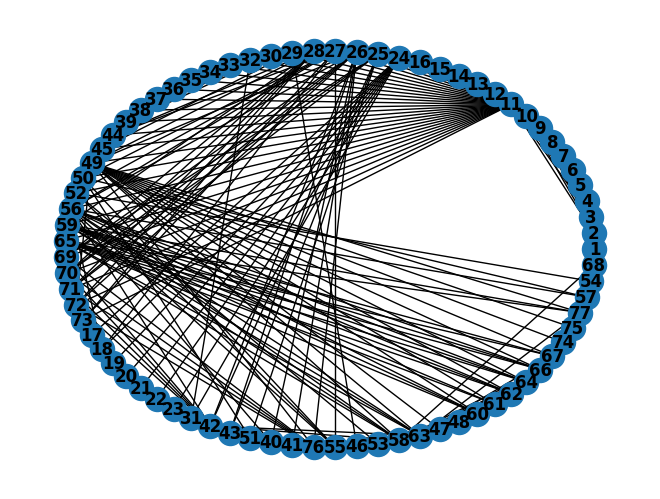

In [24]:
import pydot
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
#create radial layout for the nodes in the graph
def radial_layout(G):
    pos = {}
    nodes = list(G.nodes())
    n = len(nodes)
    
    for i, node in enumerate(nodes):
        theta = 2.0 * np.pi * i / n
        pos[node] = np.array([np.cos(theta), np.sin(theta)])
    print(pos)
    return pos
#plot the graoh
def plot_radial_layout(G):
    pos = radial_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    plt.show()

def get_data(dot_file_path):
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()

    graph = pydot.graph_from_dot_data(dot_data)

    nodes = graph[0].get_nodes()
    edges = graph[0].get_edges()

    G = nx.Graph() 
    for node in nodes:
        G.add_node(node.get_name())

    for edge in edges:
        G.add_edge(edge.get_source(), edge.get_destination())

    return G

# Example usage:
graph = get_data('Datasets/LesMiserables.dot')
plot_radial_layout(graph)


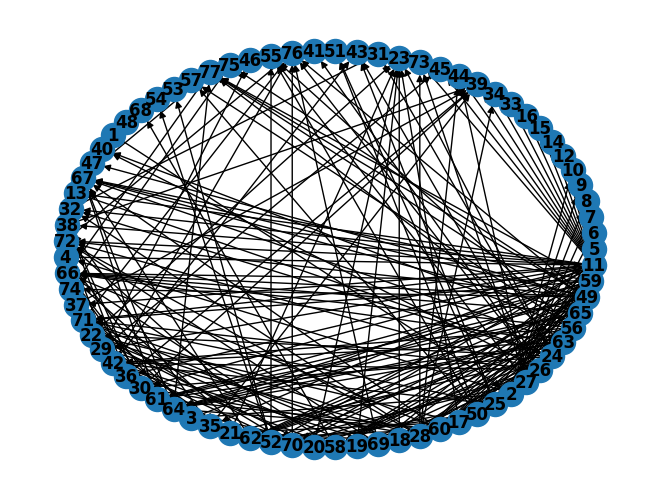

In [31]:
import pydot
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def radial_layout(G):
    pos = {}
    nodes = list(G.nodes())
    n = len(nodes)

    # Extracting weights from the edges in dot
    weights = nx.get_edge_attributes(G, 'weight')

    # Sorting nodes based on their total edge weights so they re closer
    nodes_sorted = sorted(nodes, key=lambda x: sum(weights[edge] for edge in G.edges(x)))

    interval = 2.0 * np.pi / n  # Define the interval between nodes

    for i, node in enumerate(nodes_sorted):
        theta = i * interval
        pos[node] = np.array([np.cos(theta), np.sin(theta)])

    return pos

def plot_radial_layout(G):
    pos = radial_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    plt.show()

def get_data(dot_file_path):
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()

    graph = pydot.graph_from_dot_data(dot_data)

    G = nx.DiGraph()  # directed graph
    for edge in graph[0].get_edges():
        source, destination = edge.get_source(), edge.get_destination()
        # Convert weight to float if it's a string
        weight = float(edge.get_attributes().get('weight', 1))
        G.add_edge(source, destination, weight=weight)

    return G

graph = get_data('Datasets/LesMiserables.dot')
plot_radial_layout(graph)
